In [41]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from ISLP.models import summarize

In [36]:
data = pd.read_csv('../datasets/Carseats.csv')
data = data[['Sales', 'Price', 'Urban', 'US']]
data.head()

,Sales,Price,Urban,US
0,9.50,120,Yes,Yes
1,11.22,83,Yes,Yes
2,10.06,80,Yes,Yes
3,7.40,97,Yes,Yes
4,4.15,128,Yes,No


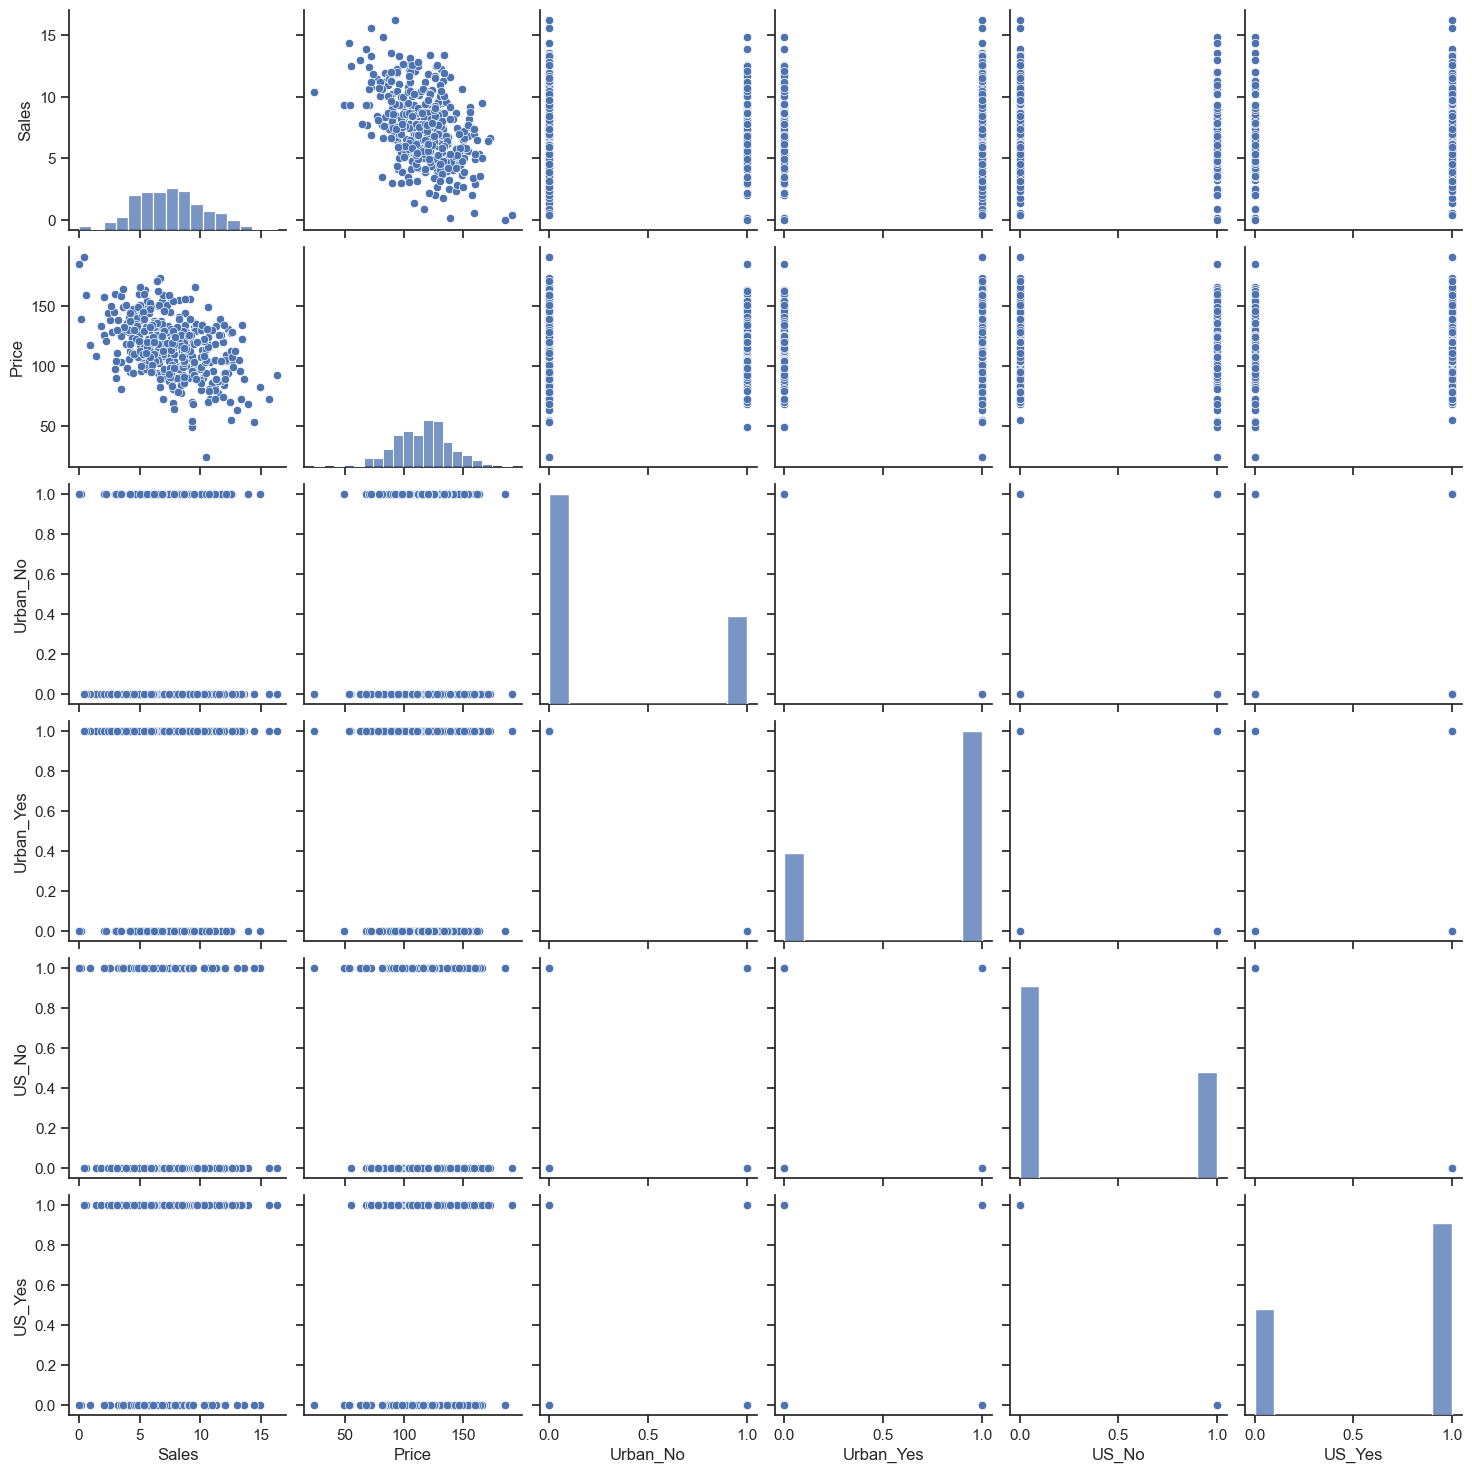

In [29]:
sns.set_theme(style="ticks")
sns.pairplot(data)

In [44]:
#model2 = smf.ols(formula='Sales ~ Price + Urban + US + Price*Urban + Price*US + Urban*US', data=data)
model2 = smf.ols(formula='Sales ~ Price + Urban + US', data=data)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           2.39e-23
Time:                        12:14:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
summarize(results2)

,coef,std err,t,P>|t|
Intercept,13.0435,0.651,20.036,0.000
Urban[T.Yes],-0.0219,0.272,-0.081,0.936
US[T.Yes],1.2006,0.259,4.635,0.000
Price,-0.0545,0.005,-10.389,0.000


# Interpretation of each coefficient in the model

* Price: an increase of one unit of price decreases sales by 0.0545 units (or an increase of 1000 in price decreases sales by 54.5 units).
* US (Yes): US variable can be 0 or 1. If it is 1, sales increase by 1.2006.
* Urban (Yes): Urban variable can be 0 or 1. If it is 1, sales decrease by 0.0219. In this case, the p-value is too high, so there is no evidence of a true relashionship between Urban and Sales.